# Chapter 10 - SIMPLE LINEAR REGRESSION

## By Iyanna Crockett Wilson

## What does Simple Linear Regression Model do?
#### It aims to find a linear relationship to describe the correlation between
#### an independent and dependent variable.

In [45]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [47]:
data = sns.load_dataset('diamonds')

In [49]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
 - The r-value is defined as the correlation or relationship between an independent and a dependent variable.
 - Its possible range is from -1 to 1.
 - 1 represents a positive correlation.
 - -1 represents a negative correlation.
 - 0 represents no relationship or correlation.

In [54]:
numeric_data = data.select_dtypes(include=['float64','int64'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix.head(7))

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


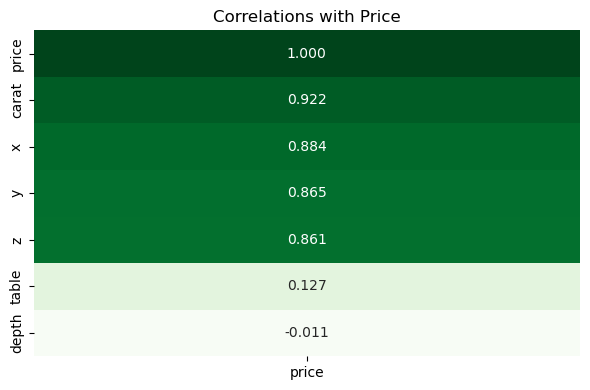

In [62]:
import matplotlib.pyplot as plt
import numpy as np
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.heatmap(np.array(price_correlation).reshape(-1,1),annot=True,fmt=".3f",cmap="Greens",xticklabels=['price'],yticklabels=price_correlation.index,cbar=False)
plt.title("Correlations with Price")
plt.tight_layout()
plt.show()

## Procedure for Creating and Using a Regression Model
1) Understand and prepare the data
2) Split the data
3) Train the regression model
4) Evaluate and interpret the model

In [68]:
strongest_corr_column = price_correlation.index[1]
X = numeric_data[[strongest_corr_column]]
y = numeric_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 20)

In [70]:
model = LinearRegression()
print(model)

LinearRegression()


In [72]:
model.fit(X_train,y_train)
print(model)

LinearRegression()


In [74]:
score = model.score(X_test, y_test)
print(score)

0.8504107786474794


In [76]:
y_pred = model.predict(X_test)
print(y_pred)

[9540.64191438 1940.07543252 3180.98424589 ... 9618.19871522 -464.18539337
 5507.68827094]


In [78]:
predicted_data = pd.DataFrame(y_pred, columns=['predicted_price'])
print(predicted_data.head(3))

   predicted_price
0      9540.641914
1      1940.075433
2      3180.984246


In [82]:
joined_data = X_test.copy()
joined_data['price'] = y_test.values
joined_data['predicted_price'] = y_pred
print(joined_data.head(5))

       carat  price  predicted_price
20244   1.52   8674      9540.641914
45013   0.54   1637      1940.075433
53351   0.70   2657      3180.984246
47212   0.59   1838      2327.859437
1460    0.86   2980      4421.893059


In [94]:
melted_data = pd.melt(joined_data.reset_index(),id_vars=[strongest_corr_column],value_vars=['price','predicted_price'],var_name='price_type',value_name='price_value')
melted_data.head()

,carat,price_type,price_value
0,1.52,price,8674.0
1,0.54,price,1637.0
2,0.70,price,2657.0
3,0.59,price,1838.0
4,0.86,price,2980.0


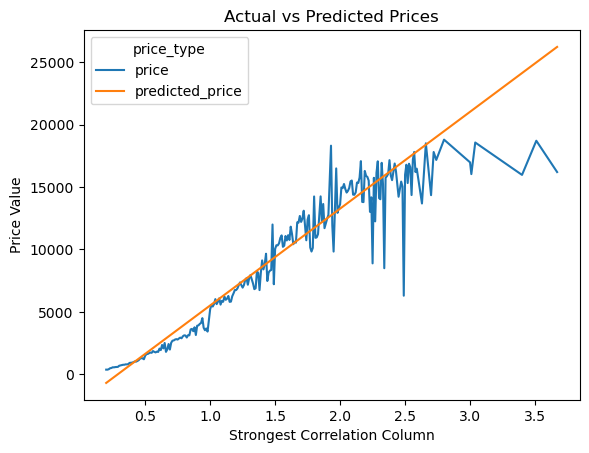

In [98]:
sns.lineplot(data=melted_data, x=strongest_corr_column, y='price_value',hue='price_type',errorbar=None)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Strongest Correlation Column')
plt.ylabel('Price Value')
plt.show()

## Regression line equation is y = mx + b, where...
-  y is the dependent variable
-  m is the slope of the line
-  x is the independent variable
-  b is the Y-intercept

In [101]:
X = data.carat.values.reshape(-1,1)
y=data.price

In [103]:
Ir = LinearRegression()
predicted = Ir.fit(X,y)

In [105]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.360580045423


In [108]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.360580045423


In [112]:
predictedp1 = m * 0.70 + b
print(f'The predicted price for a 0.70 carat diamond is ${predictedp1}')

The predicted price for a 0.70 carat diamond is $[3173.13735253]


In [114]:
predictedp2 = m * 0.54 + b
print(f'The predicted price for a 0.54 carat diamond is ${predictedp2}')

The predicted price for a 0.54 carat diamond is $[1932.10925366]


### Yes, the estimates in the previous two cells are close to the 
 predicted prices in the results of step 18.